In [231]:
import pandas as pd
import numpy as np
import collections

In [232]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

from shapely.geometry import Point
import os
os.environ['PROJ_LIB']=r"C:\Users\costa\Anaconda3\Library\share"

from fiona.crs import from_epsg

In [233]:
geo_data = pd.read_excel("geo.xlsx", index_col=0)

In [234]:
mo_gdf = gpd.read_file('moscow-shape/data/boundary-polygon.shp')

In [235]:
crs = {'init' :'epsg:3857'}

In [236]:
mo_gdf = mo_gdf.to_crs(crs) # преобразование проекции

In [237]:
geo_data['coords'] = list(zip(geo_data.x, geo_data.y))
geo_data['coords'] = geo_data['coords'].apply(Point)

In [238]:
geo_data.head()

,x,y,comment_class,coords
0,37.612416,55.777454,-1,POINT (37.612416 55.777454)
1,37.612416,55.777454,-1,POINT (37.612416 55.777454)
2,37.603298,55.742108,-1,POINT (37.603298 55.742108)
3,37.558526,55.728758,-1,POINT (37.558526 55.728758)
4,37.566431,55.731794,-1,POINT (37.566431 55.731794)


In [239]:
data_gdf = gpd.GeoDataFrame(geo_data, geometry='coords')
data_gdf.crs = from_epsg(4326)
data_gdf = data_gdf.to_crs(crs)
data_gdf.head()

,x,y,comment_class,coords
0,37.612416,55.777454,-1,POINT (4186994.996624777 7514240.002215464)
1,37.612416,55.777454,-1,POINT (4186994.996624777 7514240.002215464)
2,37.603298,55.742108,-1,POINT (4185979.985507724 7507247.018180069)
3,37.558526,55.728758,-1,POINT (4180995.989265926 7504607.452533467)
4,37.566431,55.731794,-1,POINT (4181875.969840648 7505207.651979873)


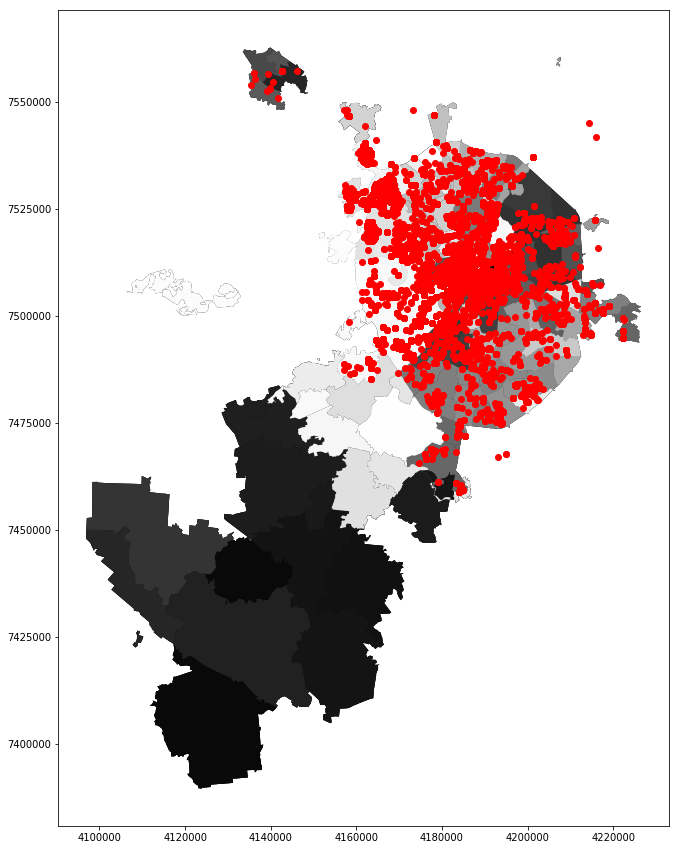

In [240]:
fig, ax = plt.subplots(figsize=[15,15])
mo_gdf.plot(ax=ax, cmap='gist_gray')
data_gdf.plot(ax = ax, color='red')

In [241]:
from sklearn.cluster import MiniBatchKMeans

In [242]:
clusters = 12

In [243]:
clst = MiniBatchKMeans(random_state=123, n_clusters=clusters)

In [244]:
clst.fit(geo_data[["x","y"]].values)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=12,
        n_init=3, random_state=123, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [245]:
point_classes = clst.predict(geo_data[["x","y"]].values)

In [246]:
collections.Counter(point_classes)

Counter({0: 8652,
         8: 13926,
         4: 17245,
         5: 6329,
         6: 3577,
         11: 6212,
         9: 1959,
         1: 12581,
         3: 10029,
         2: 10895,
         10: 7092,
         7: 10309})

In [247]:
import matplotlib.colors
cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=0, vmax=clusters-1)

In [248]:
data_gdf['class']=point_classes

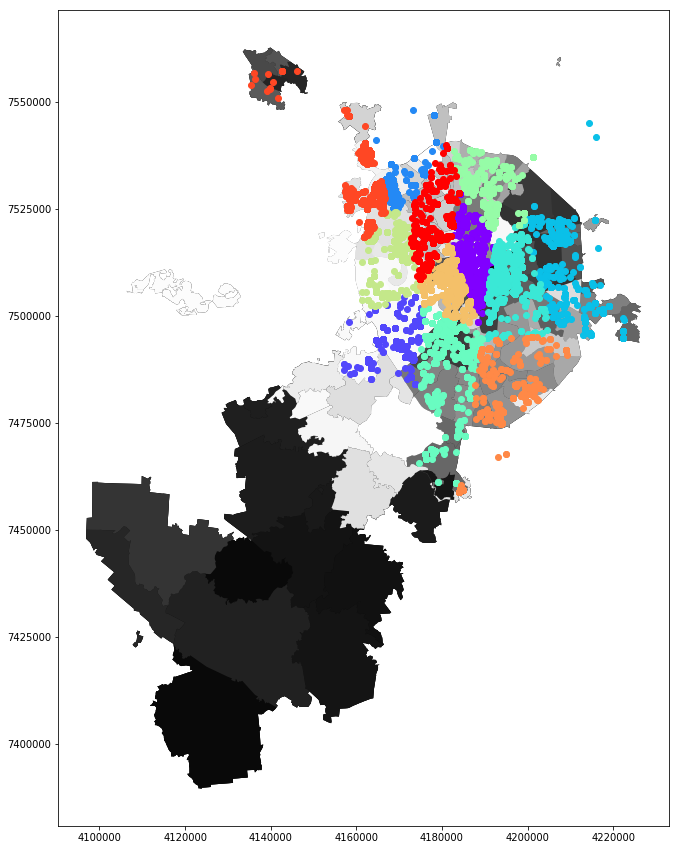

In [249]:
fig, ax = plt.subplots(figsize=[15,15])
mo_gdf.plot(ax=ax, cmap='gist_gray')
for idx, gp in data_gdf.groupby('class'):
    gp.plot(ax = ax, color=cmap(norm(idx)))

<Figure size 432x288 with 0 Axes>